# Credit card fraud Transaction 

## Importing required libraries 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

### Ignore all FutureWarning messages globally

In [2]:

warnings.filterwarnings("ignore", category=FutureWarning)

## Data cleaning and Preprocessing 

In [3]:
df = pd.read_csv("fraudTest.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
# Convert date-time columns to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [6]:
# Clean 'gender' column and encode as 0 for female, 1 for male
df['gender'] = df['gender'].str.lower().apply(lambda x: 1 if x.startswith('m') else (0 if x.startswith('f') else None))

# Clean columns with special characters and replace with NaN
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: re.sub(r'[^A-Za-z0-9]', '', str(x)))
        df.loc[df[col].str.len() <= 1, col] = np.nan

# Remove columns starting with 'Unnamed'
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=unnamed_columns)

# Basic statistics summary
summary = df.describe()

In [7]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraudKirlinandSons,personalcare,2.86,Jeff,Elliott,1,351DarleneGreen,Columbia,...,33.9659,-80.9355,333497,Mechanicalengineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraudSporerKeebler,personalcare,29.84,Joanne,Williams,0,3638MarshUnion,Altonah,...,40.3207,-110.4360,302,SalesprofessionalIT,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,fraudSwaniawskiNitzscheandWelch,healthfitness,41.28,Ashley,Lopez,0,9333ValentinePoint,Bellmore,...,40.6729,-73.5365,34496,Librarianpublic,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraudHaleyGroup,miscpos,60.05,Brian,Williams,1,32941KrystalMillApt552,Titusville,...,28.5697,-80.8191,54767,Setdesigner,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraudJohnstonCasper,travel,3.19,Nathan,Massey,1,5783EvanRoadsApt465,Falmouth,...,44.2529,-85.0170,1126,Furnituredesigner,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraudReillyandSons,healthfitness,43.77,Michael,Olson,1,558MichaelEstates,Luray,...,40.4931,-91.8912,519,Townplanner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraudHoppeParisian,kidspets,111.84,Jose,Vasquez,1,572DavisMountains,LakeJackson,...,29.0393,-95.4401,28739,Futurestrader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraudRauRobel,kidspets,86.88,Ann,Lawson,0,144EvansIslandsApt683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraudBreitenbergLLC,travel,7.99,Eric,Preston,1,7020DoyleStreamApt951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [8]:
print(df.describe())
print(df.info())

               trans_date_trans_time        cc_num            amt  \
count                         555719  5.557190e+05  555719.000000   
mean   2020-10-02 01:54:25.166780672  4.178387e+17      69.392810   
min              2020-06-21 12:14:25  6.041621e+10       1.000000   
25%       2020-08-09 06:10:27.500000  1.800429e+14       9.630000   
50%              2020-10-03 00:59:48  3.521417e+15      47.290000   
75%              2020-12-01 03:03:04  4.635331e+15      83.010000   
max              2020-12-31 23:59:34  4.992346e+18   22768.110000   
std                              NaN  1.309837e+18     156.745941   

              gender            zip            lat           long  \
count  555719.000000  555719.000000  555719.000000  555719.000000   
mean        0.451367   48842.628015      38.543253     -90.231325   
min         0.000000    1257.000000      20.027100    -165.672300   
25%         0.000000   26292.000000      34.668900     -96.798000   
50%         0.000000   48174.0000

In [9]:
# Convert all string columns to lowercase
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.lower()

In [10]:
#verify everything is in lowercase now 
print(df.head())

  trans_date_trans_time            cc_num                         merchant  \
0   2020-06-21 12:14:25  2291163933867244               fraudkirlinandsons   
1   2020-06-21 12:14:33  3573030041201292               fraudsporerkeebler   
2   2020-06-21 12:14:53  3598215285024754  fraudswaniawskinitzscheandwelch   
3   2020-06-21 12:15:15  3591919803438423                  fraudhaleygroup   
4   2020-06-21 12:15:17  3526826139003047              fraudjohnstoncasper   

        category    amt   first      last  gender                  street  \
0   personalcare   2.86    jeff   elliott       1         351darlenegreen   
1   personalcare  29.84  joanne  williams       0          3638marshunion   
2  healthfitness  41.28  ashley     lopez       0      9333valentinepoint   
3        miscpos  60.05   brian  williams       1  32941krystalmillapt552   
4         travel   3.19  nathan    massey       1     5783evanroadsapt465   

         city  ...      lat      long  city_pop                  job

In [11]:
# Identify and delete duplicate records
duplicate = df.duplicated().sum()
if duplicate >0:
    df = df.drop_duplicates()

else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


## Basic EDA (EDA before Feature engineering)

### 1. Gender distribution

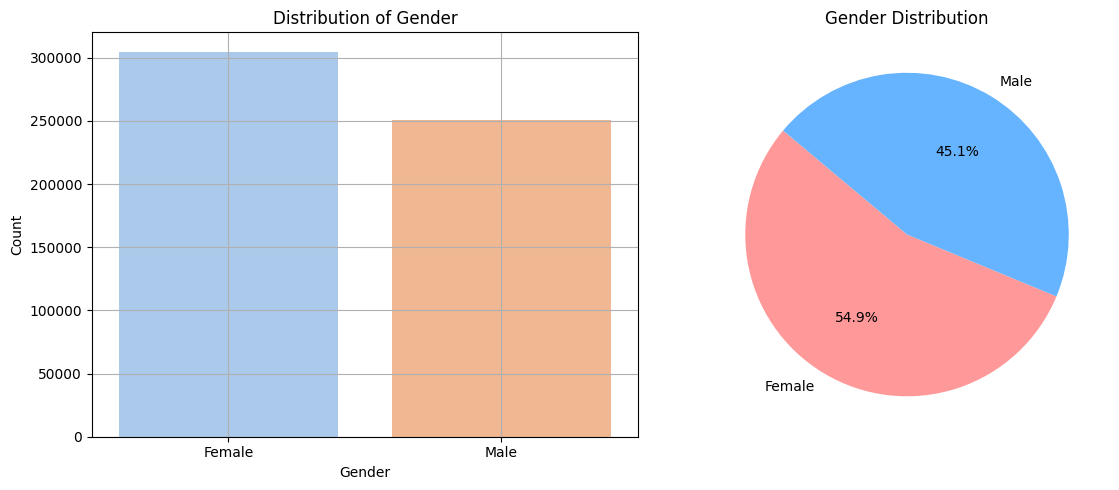

In [12]:
plt.figure(figsize=(12, 5))

# Countplot for gender distribution
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(True)

# Pie chart for gender distribution
plt.subplot(1, 2, 2)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


### 2. Fraudulent vs. non-fraudulent transactions

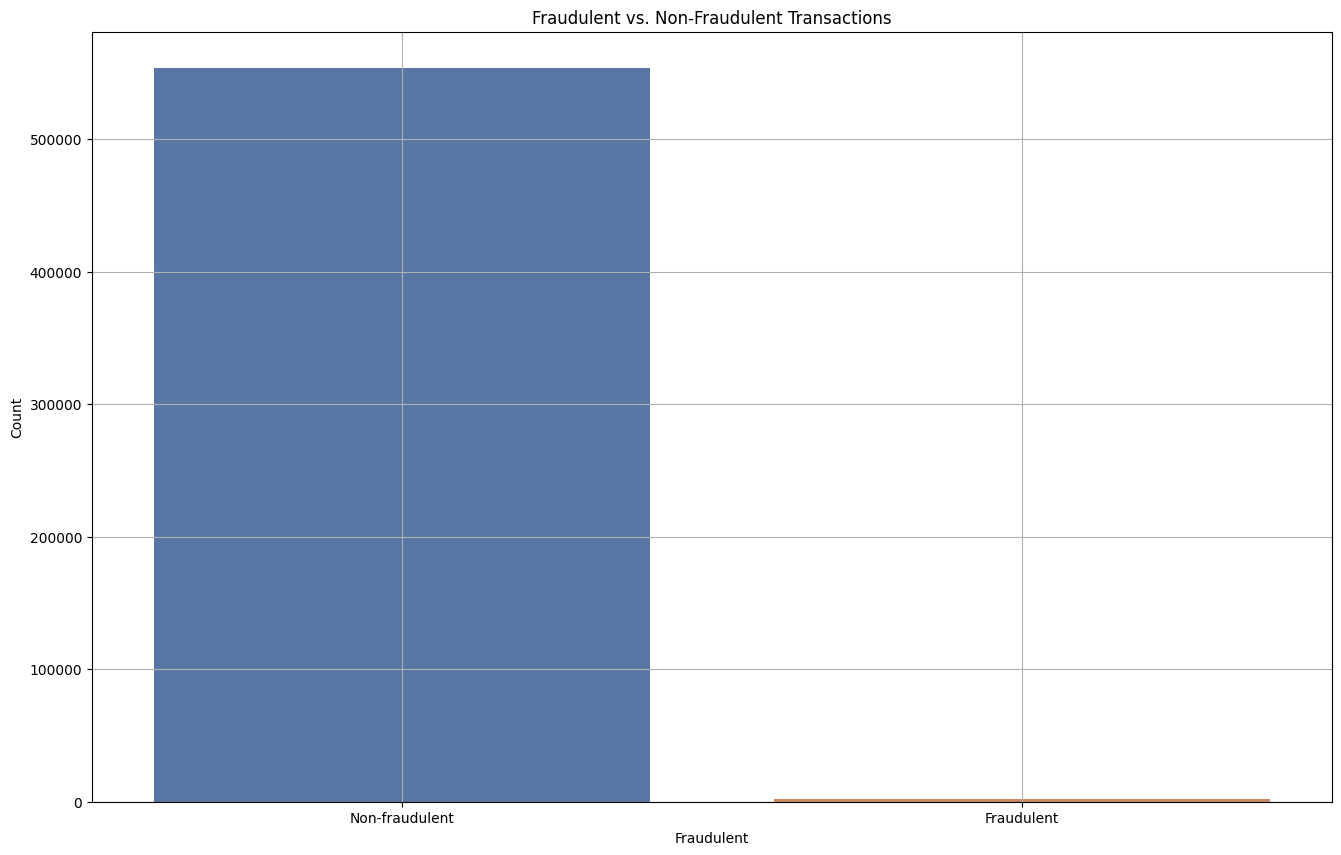

In [13]:
plt.figure(figsize=(16, 10))
sns.countplot(x='is_fraud', data=df, palette='deep')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-fraudulent', 'Fraudulent'])
plt.grid(True)
plt.show()


### 3. Distribution of transaction dates over time

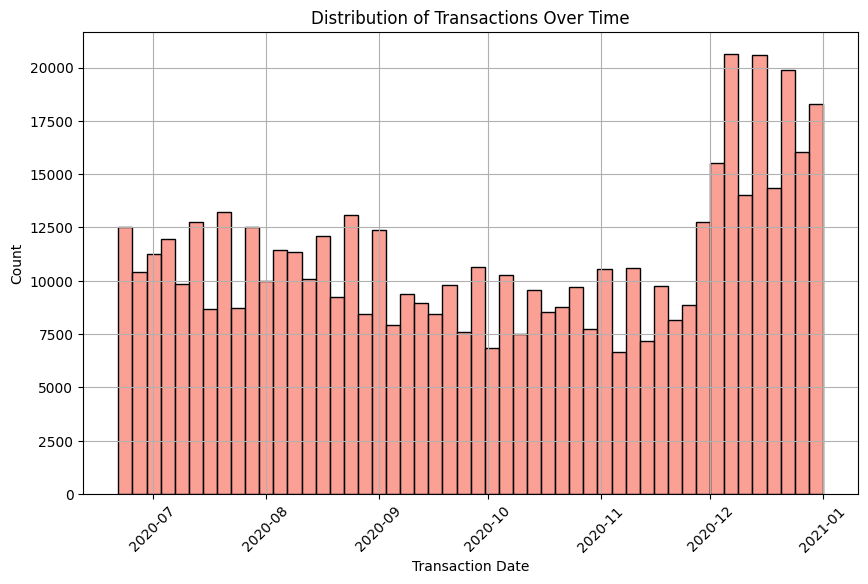

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trans_date_trans_time'], bins=50, kde=False, color='salmon')
plt.xlabel('Transaction Date')
plt.ylabel('Count')
plt.title('Distribution of Transactions Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 4. Transaction amount vs. fraud status

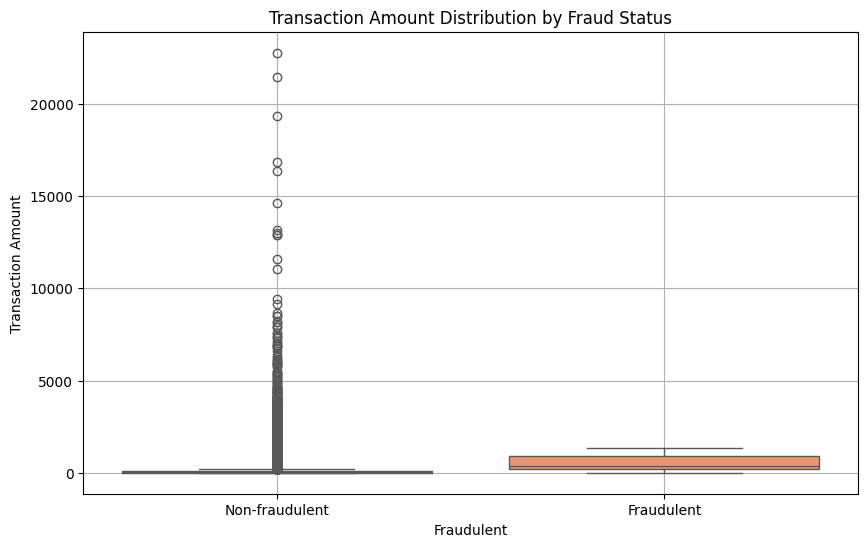

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df, palette='Set2')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xticks([0, 1], ['Non-fraudulent', 'Fraudulent'])
plt.grid(True)
plt.show()


### 5. Distribution of transaction categories

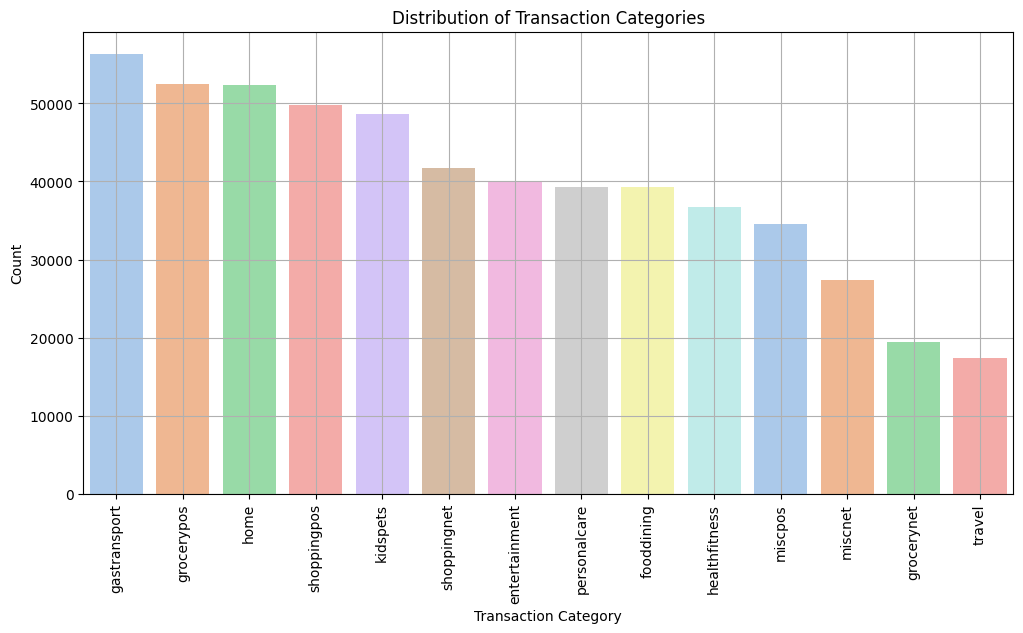

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, palette='pastel', order=df['category'].value_counts().index)
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### 6. Age distribution of cardholders

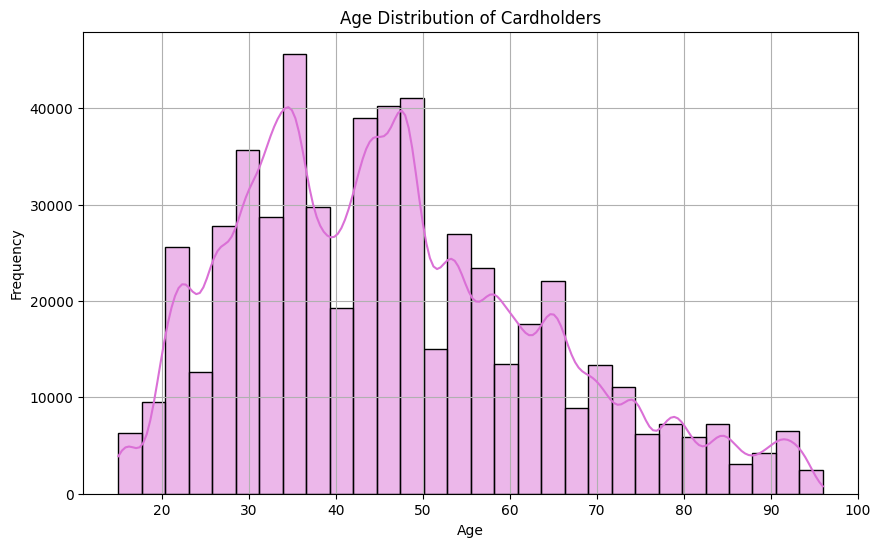

In [17]:
# Calculate age in years
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year) - ((df['trans_date_trans_time'].dt.month < df['dob'].dt.month) | ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & (df['trans_date_trans_time'].dt.day < df['dob'].dt.day)))

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='orchid')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Cardholders')
plt.grid(True)
plt.show()


### 7. Relationship between transaction amount and cardholder age

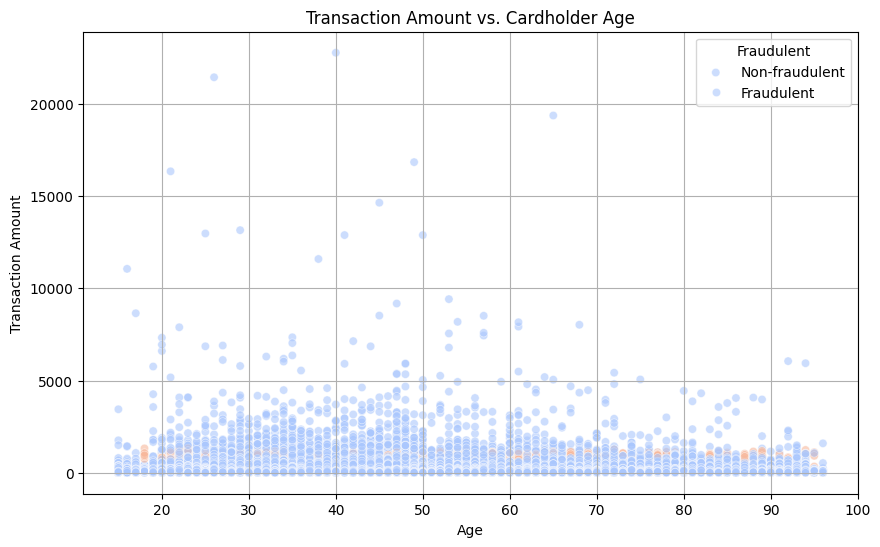

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='amt', data=df, hue='is_fraud', palette='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Cardholder Age')
plt.legend(title='Fraudulent', labels=['Non-fraudulent', 'Fraudulent'])
plt.grid(True)
plt.show()


### 8. Distribution of merchant locations

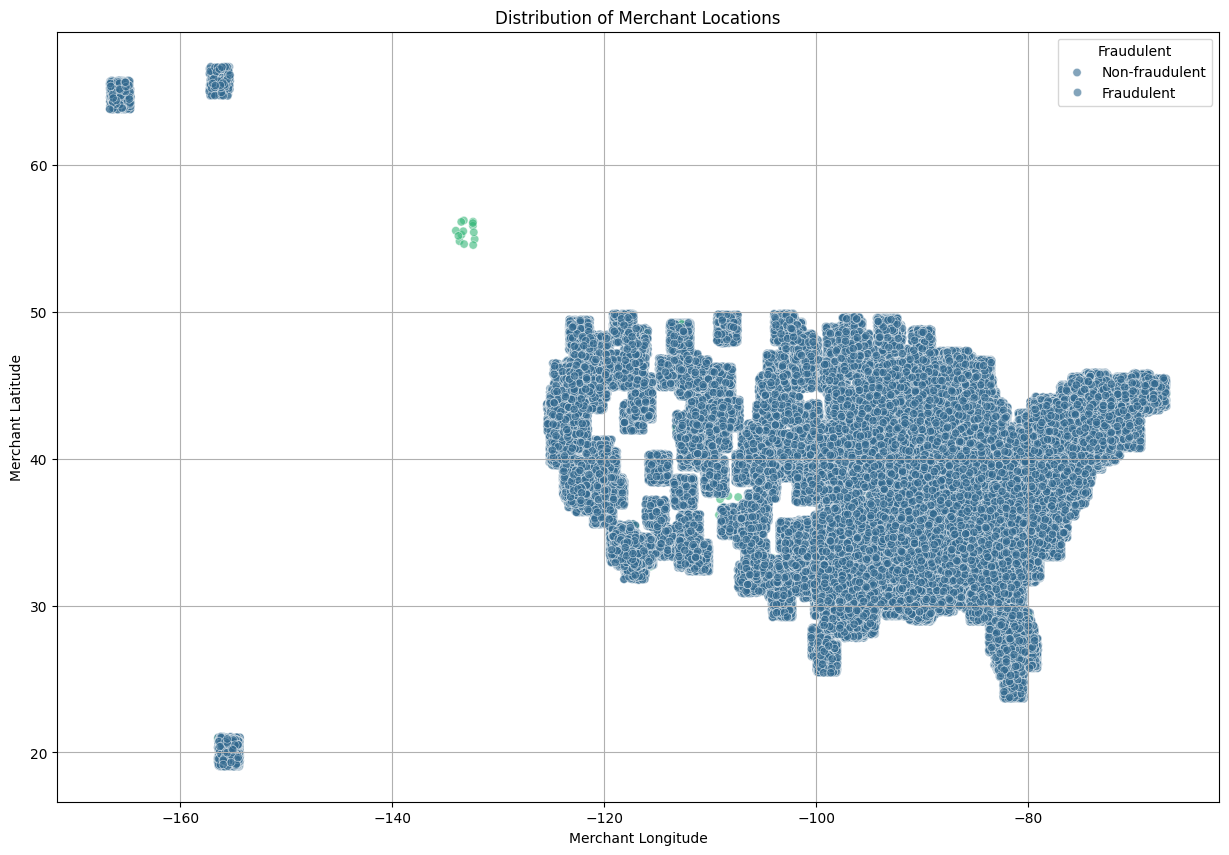

In [19]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='merch_long', y='merch_lat', data=df, hue='is_fraud', palette='viridis', alpha=0.6)
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Distribution of Merchant Locations')
plt.legend(title='Fraudulent', labels=['Non-fraudulent', 'Fraudulent'])
plt.grid(True)
plt.show()


### 9. Monthly transaction volume

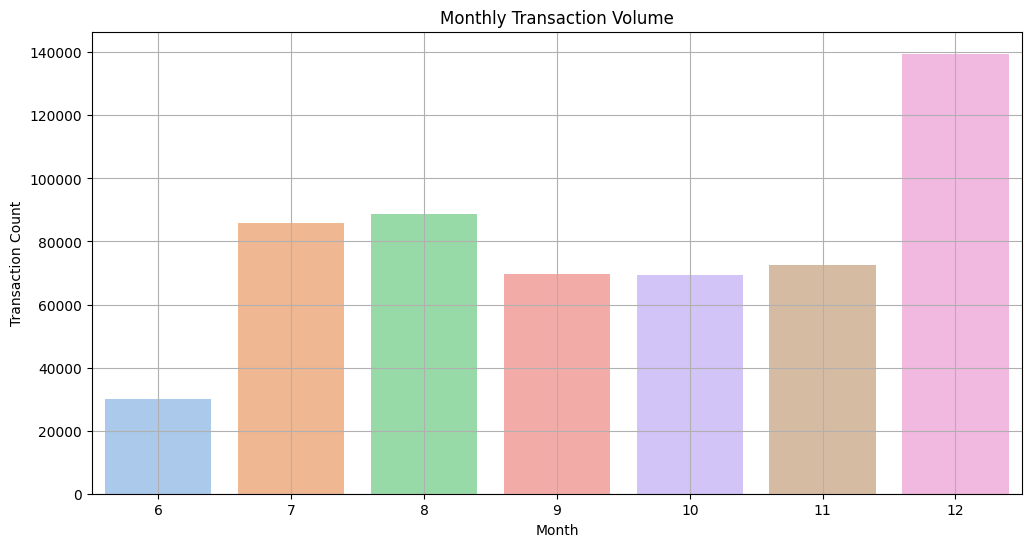

In [20]:
df['month'] = df['trans_date_trans_time'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, palette='pastel')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Volume')
plt.grid(True)
plt.show()


### 10. Distribution of transaction times during the day

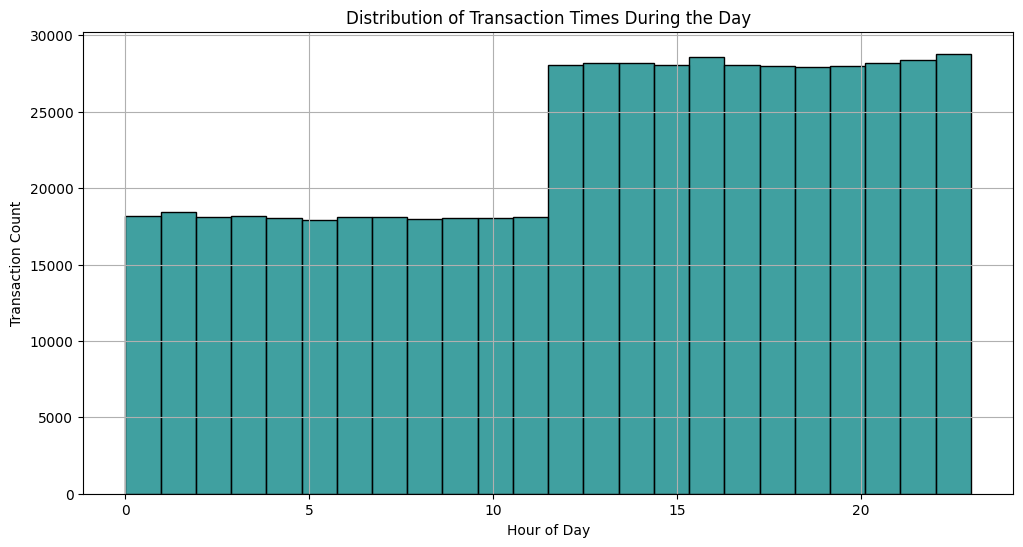

In [21]:
df['hour'] = df['trans_date_trans_time'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=False, color='teal')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transaction Times During the Day')
plt.grid(True)
plt.show()


### 11. Transaction frequency by cardholder

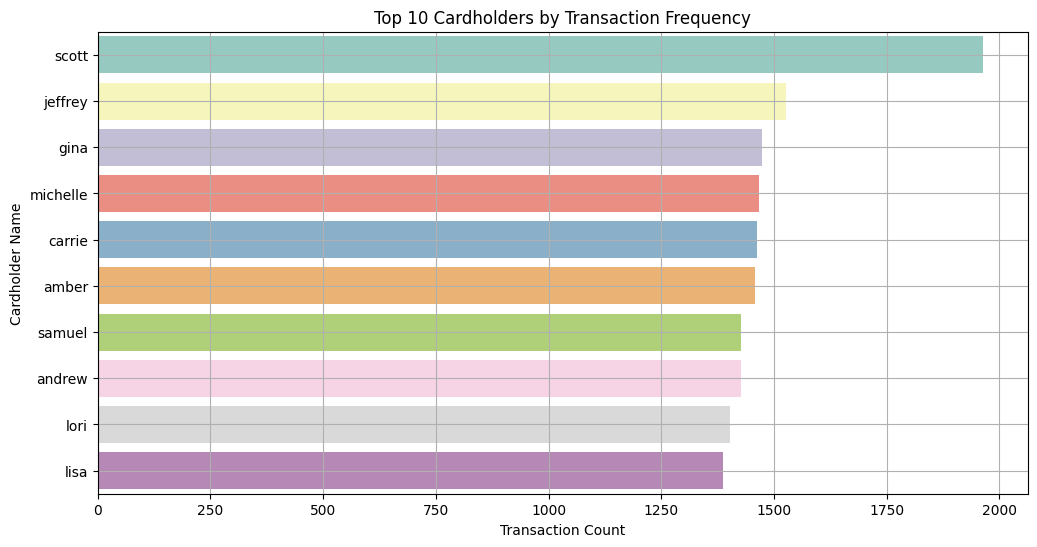

In [22]:
cardholder_freq = df.groupby(['first', 'last'])['trans_num'].count().reset_index()
cardholder_freq = cardholder_freq.sort_values(by='trans_num', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='trans_num', y='first', data=cardholder_freq, palette='Set3')
plt.xlabel('Transaction Count')
plt.ylabel('Cardholder Name')
plt.title('Top 10 Cardholders by Transaction Frequency')
plt.grid(True)
plt.show()


### 12. Relationship between transaction amount and city population

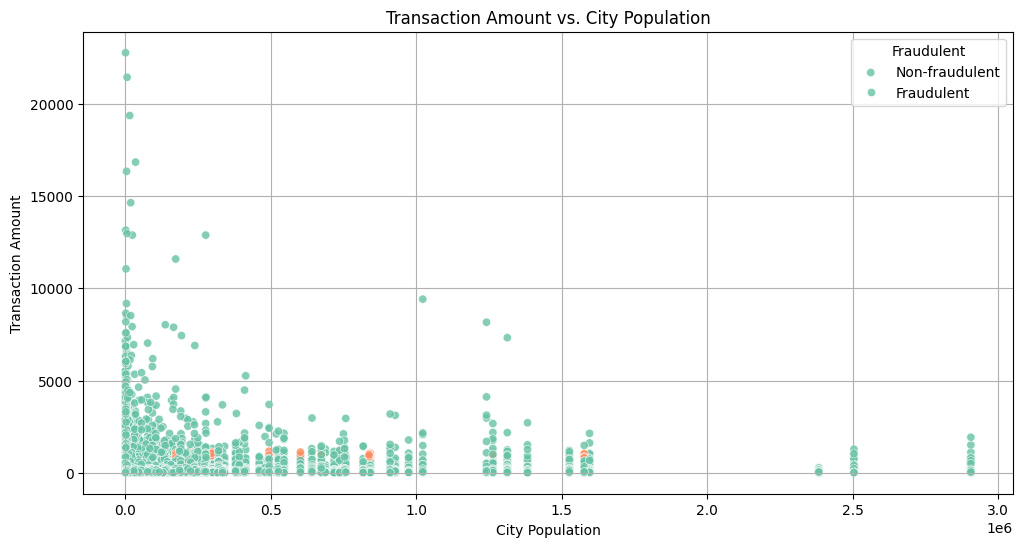

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='city_pop', y='amt', data=df, hue='is_fraud', palette='Set2', alpha=0.8)
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. City Population')
plt.legend(title='Fraudulent', labels=['Non-fraudulent', 'Fraudulent'])
plt.grid(True)
plt.show()


### 13. Distribution of Top 10 job categories

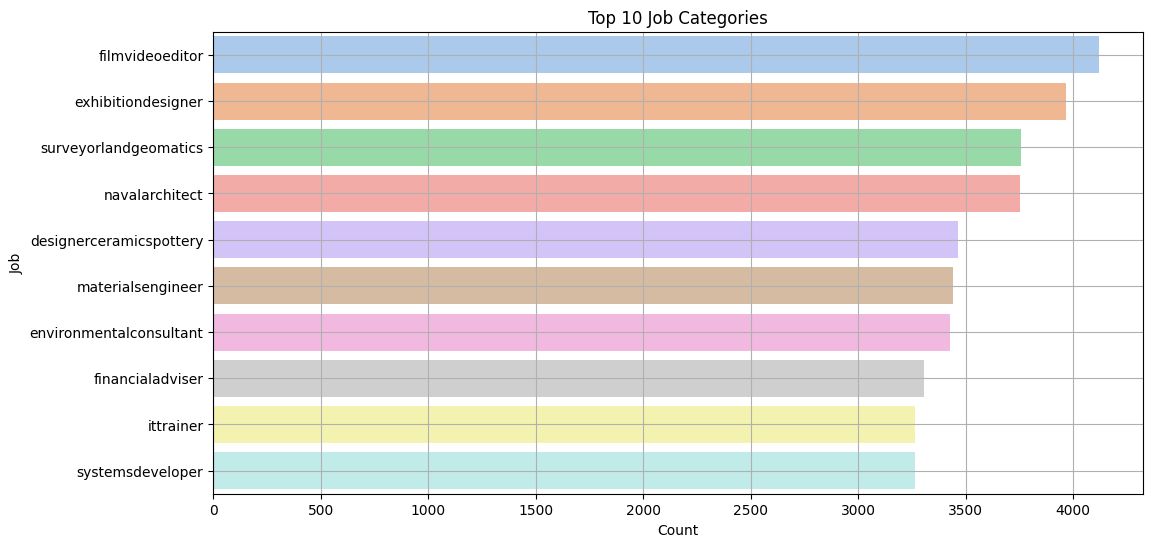

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df, palette='pastel', order=df['job'].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Top 10 Job Categories')
plt.grid(True)
plt.show()


### 14. Relationship between transaction amount and merchant category

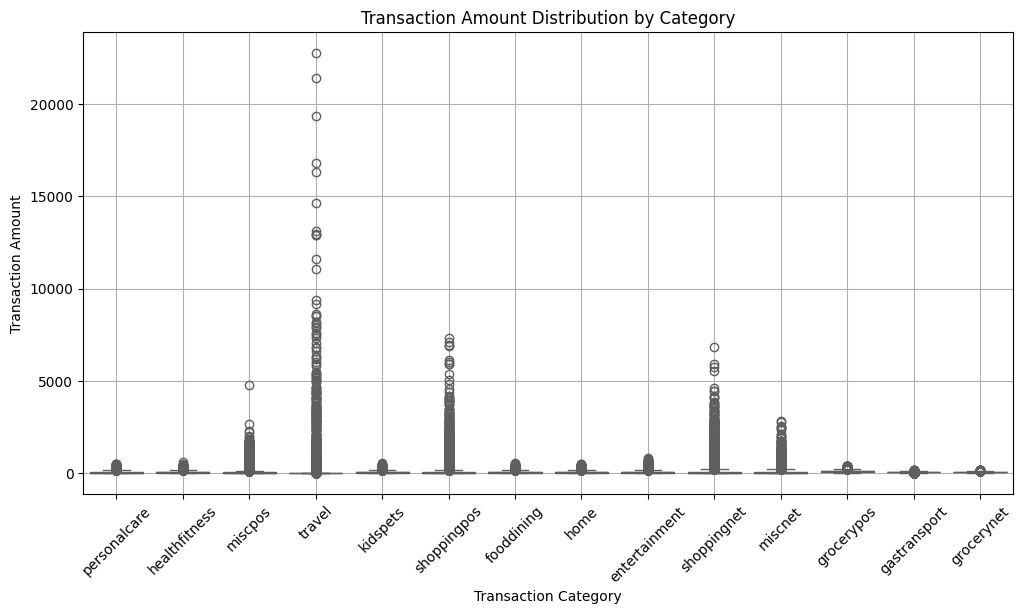

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=df, palette='Set3')
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 15. Distribution of fraudulent transactions by state

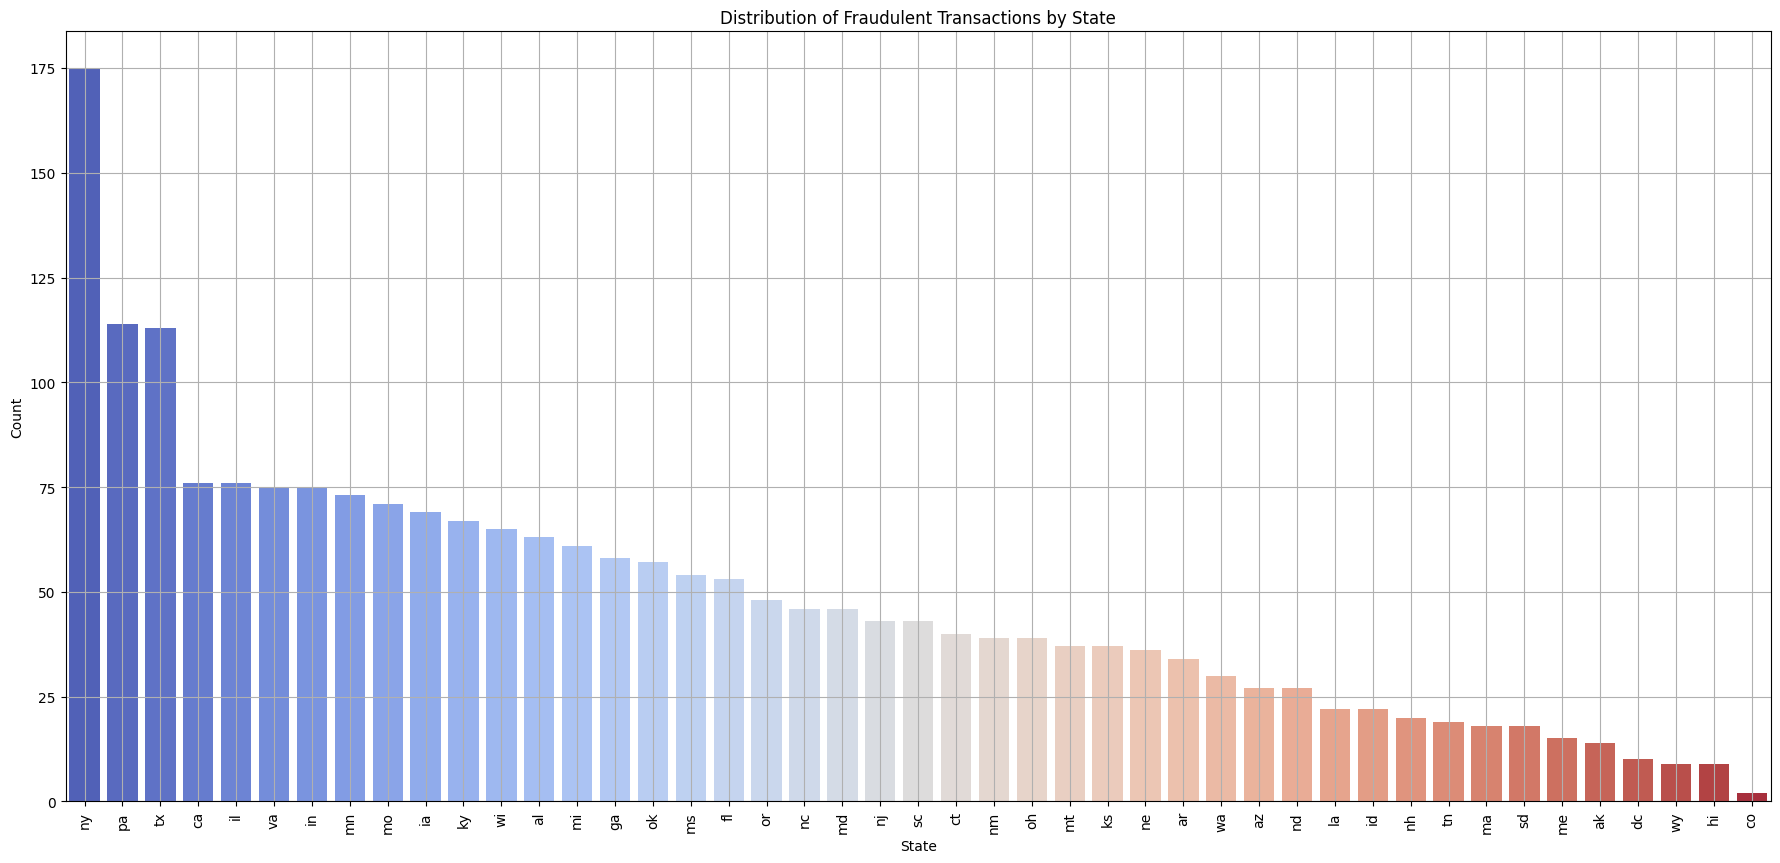

In [26]:

fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts()
plt.figure(figsize=(22, 10))
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values, palette='coolwarm')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions by State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### 16. Average transaction amount by gender

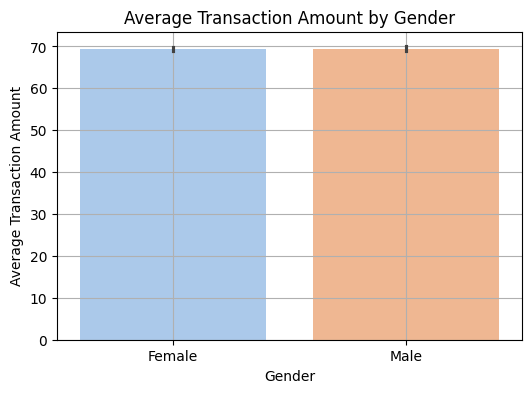

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='amt', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(True)
plt.show()


### 17. Distribution of transaction times by gender

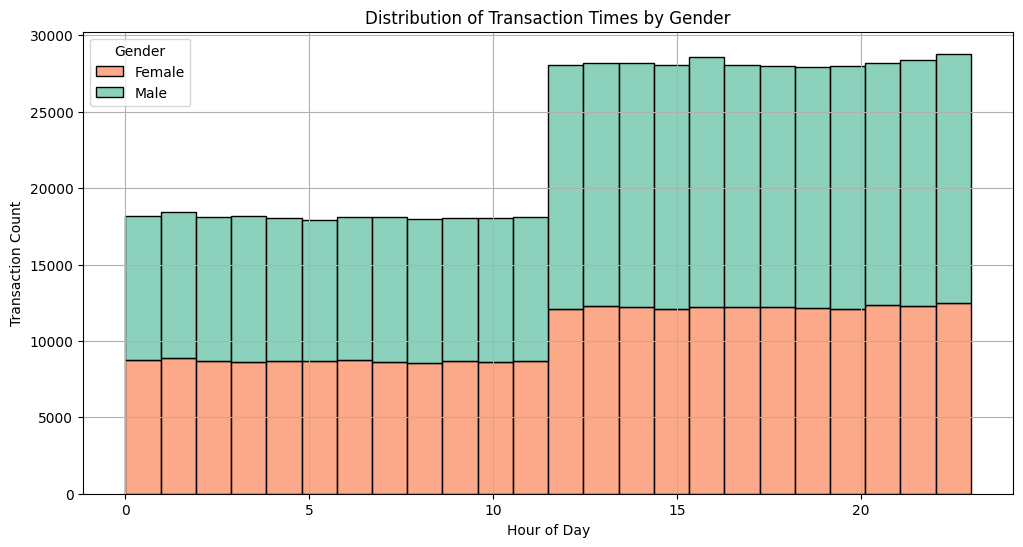

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(x='hour', hue='gender', data=df, multiple='stack', bins=24, palette='Set2')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transaction Times by Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.grid(True)
plt.show()

### 18. Fraudulent transactions over time

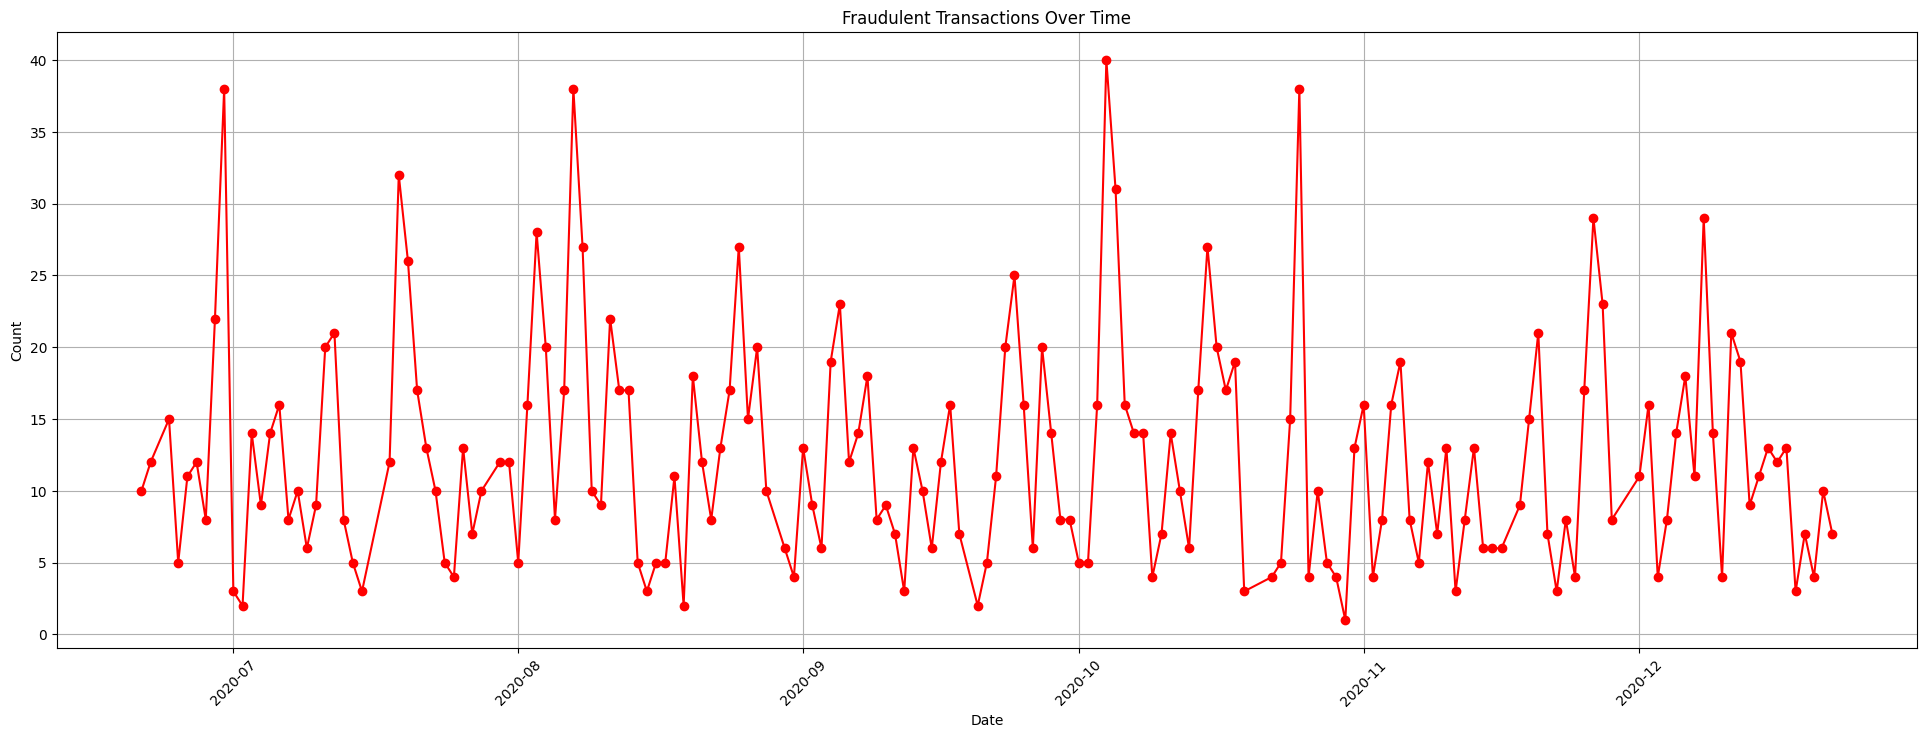

In [29]:
plt.figure(figsize=(24, 8))
df['day'] = df['trans_date_trans_time'].dt.date
fraud_over_time = df[df['is_fraud'] == 1].groupby('day').size()
plt.plot(fraud_over_time.index, fraud_over_time.values, marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Fraudulent Transactions Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 19.Get the top 10 categories by transaction count

<Figure size 1400x800 with 0 Axes>

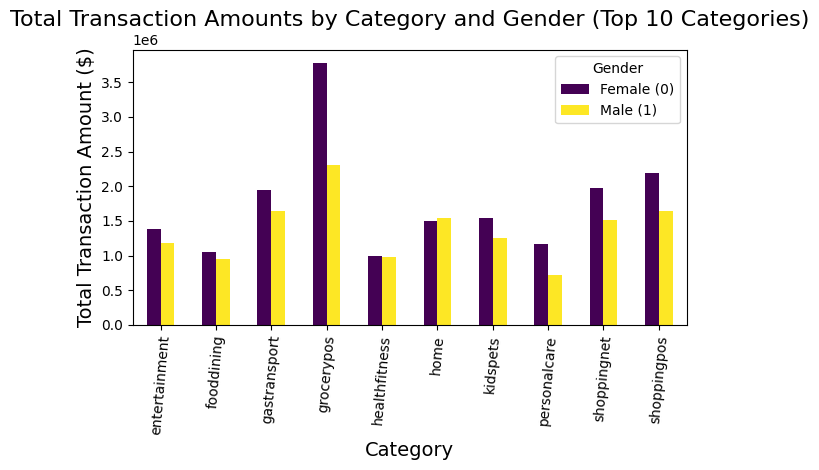

In [30]:
top_10_categories = df['category'].value_counts().head(10).index

# Filter the dataframe to include only top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]

# Aggregate the transaction amounts by category and gender
category_gender_amt = df_top_10.groupby(['category', 'gender'])['amt'].sum().unstack().fillna(0)

# Plot the grouped bar plot
plt.figure(figsize=(14, 8))
ax = category_gender_amt.plot(kind='bar', colormap='viridis')
plt.title('Total Transaction Amounts by Category and Gender (Top 10 Categories)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Transaction Amount ($)', fontsize=14)
plt.xticks(rotation=85)

# Customize legend to show '0' for Female and '1' for Male
handles, labels = ax.get_legend_handles_labels()
labels = ['Female (0)', 'Male (1)']
ax.legend(handles, labels, title='Gender')

plt.tight_layout()
plt.show()


### 20. Fraud Transactions by City Population Segment

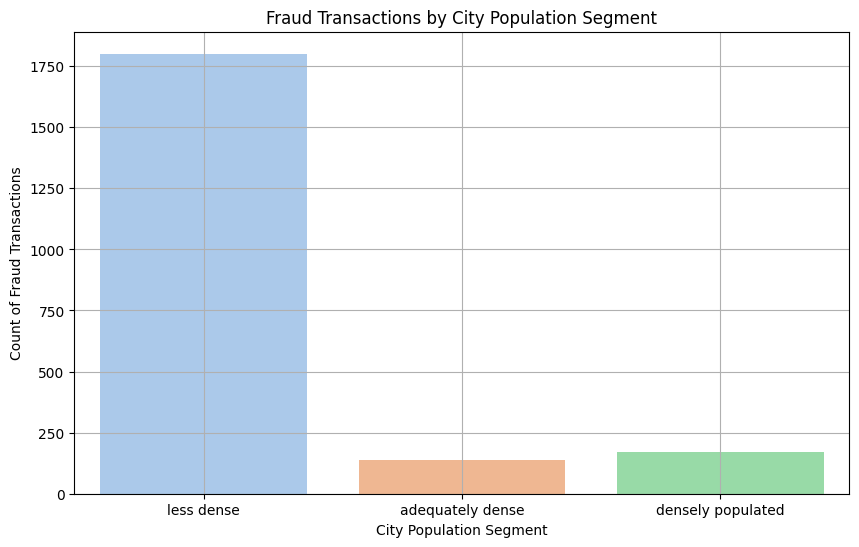

In [31]:
# Create city population segments for analysis with specified labels
df['city_pop_segment'] = pd.cut(df['city_pop'], bins=[0, 50000, 100000, 1000000], labels=['less dense', 'adequately dense', 'densely populated'])

# Initialize a separate data containing fraud transactions to analyze trends
data_fraud = df[df["is_fraud"] == 1]

# Look at the fraud transactions done in cities according to their populations
plt.figure(figsize=(10, 6))
sns.countplot(x='city_pop_segment', data=data_fraud, palette='pastel')
plt.xlabel('City Population Segment')
plt.ylabel('Count of Fraud Transactions')
plt.title('Fraud Transactions by City Population Segment')
plt.grid(True)
plt.show()


### 21. Fraud Transactions by Distance from Customer Residence

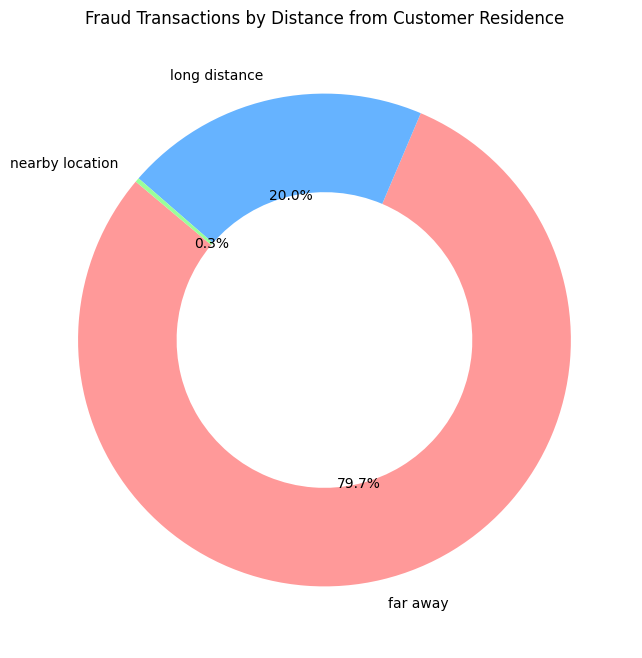

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate the distance and create a new 'distance_km' column
df['distance_km'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

# Segment the distances into categories
bins = [0, 5, 50, np.inf]
labels = ['nearby location', 'long distance', 'far away']
df['distance_segment'] = pd.cut(df['distance_km'], bins=bins, labels=labels)

# Initialize a separate data containing fraud transactions to analyze trends
data_fraud = df[df["is_fraud"] == 1]

# Check how far frauds happen from customer's residence
plt.figure(figsize=(8, 8))
fraud_distance_counts = data_fraud['distance_segment'].value_counts()

# Create a donut chart
plt.pie(fraud_distance_counts, labels=fraud_distance_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'], wedgeprops=dict(width=0.4))
plt.title('Fraud Transactions by Distance from Customer Residence')
plt.show()


### 22. Top fraudulent records for a given column

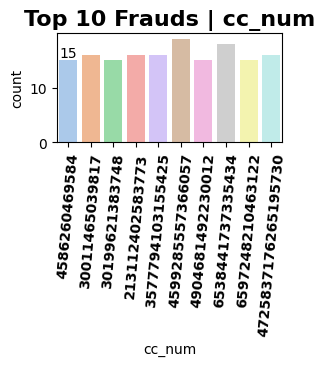

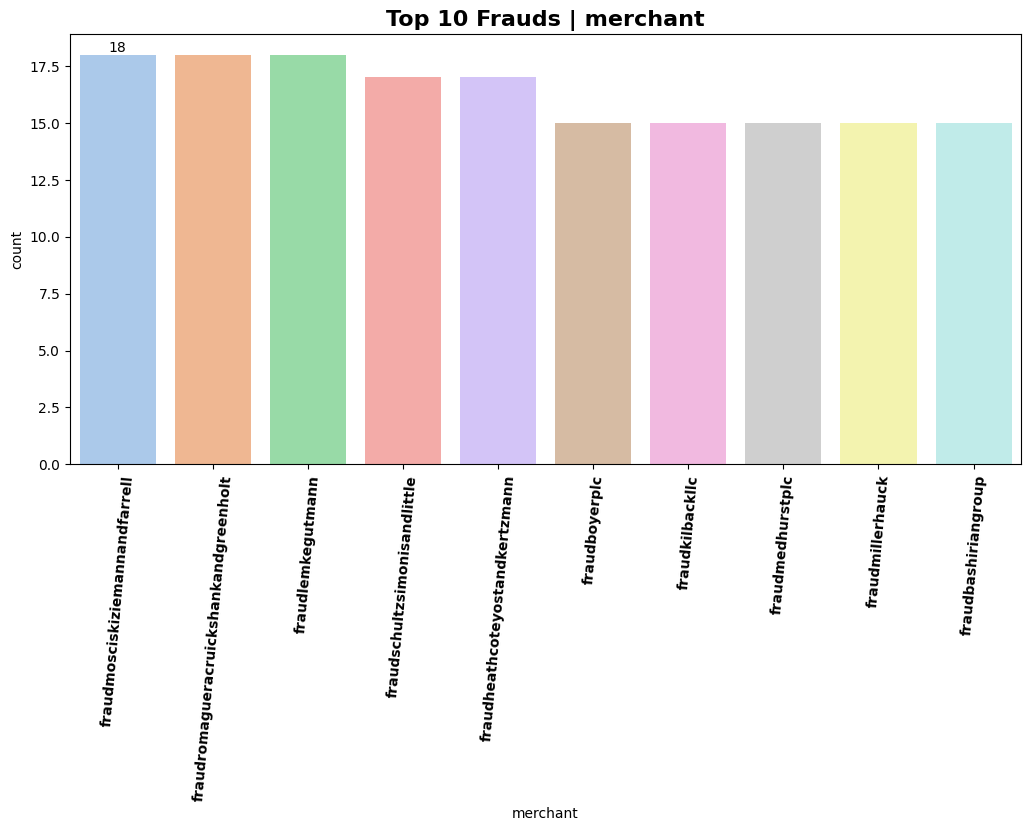

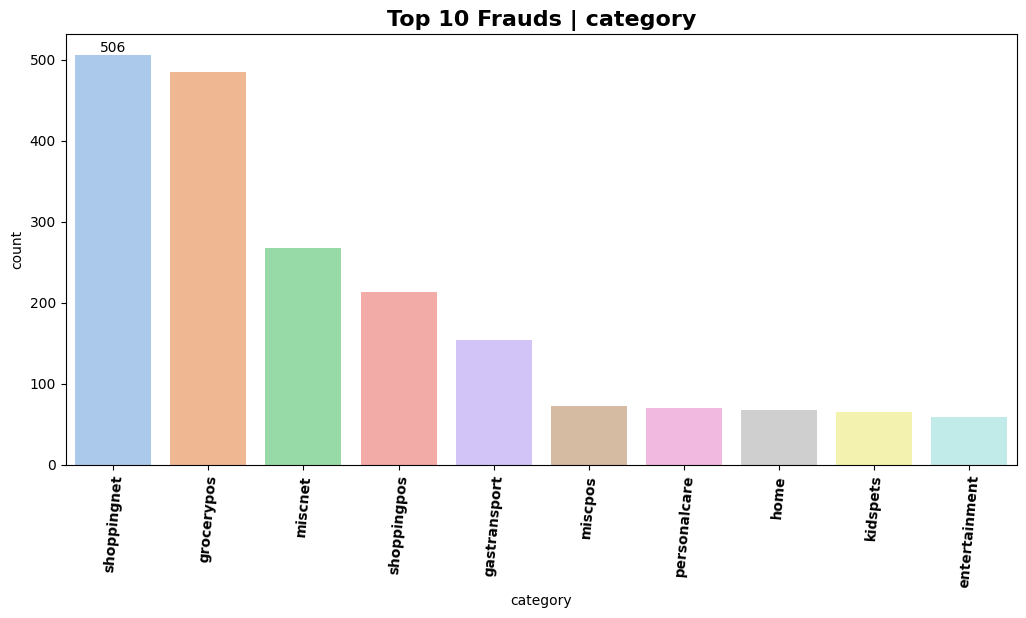

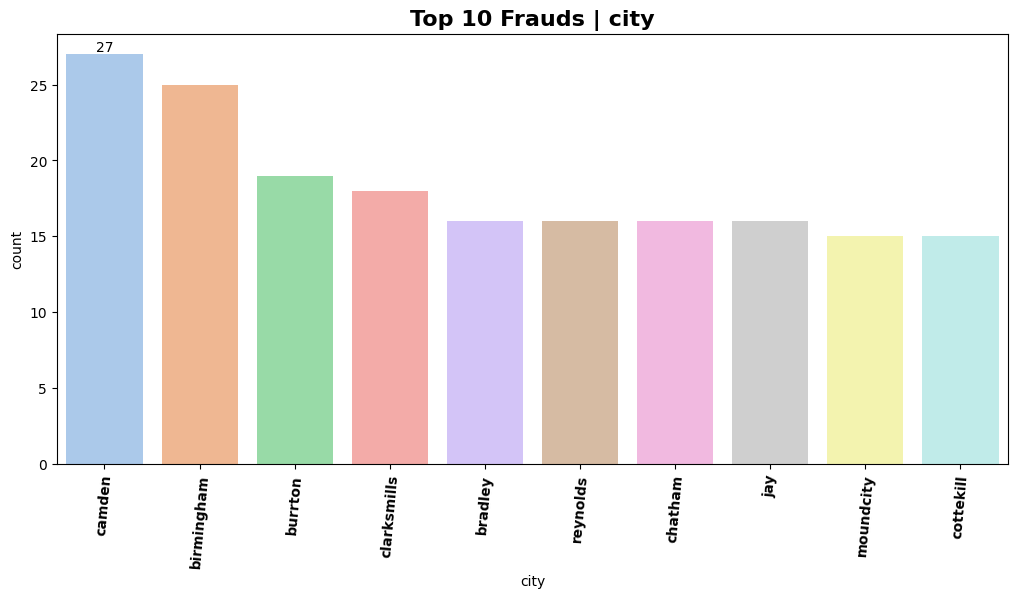

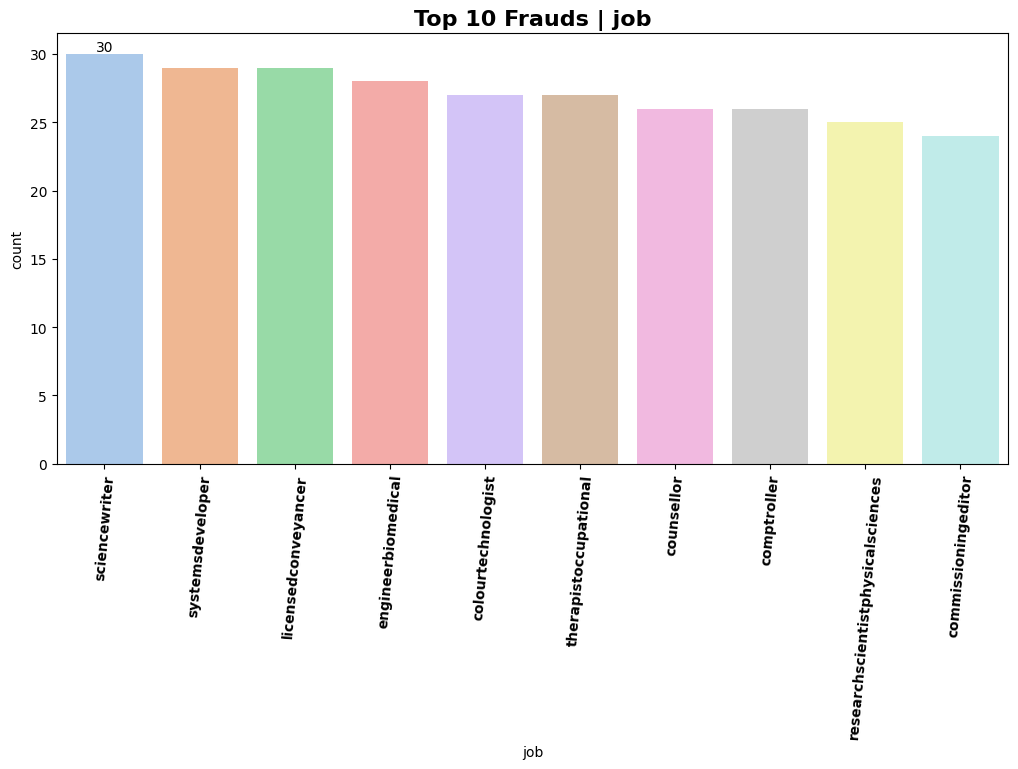

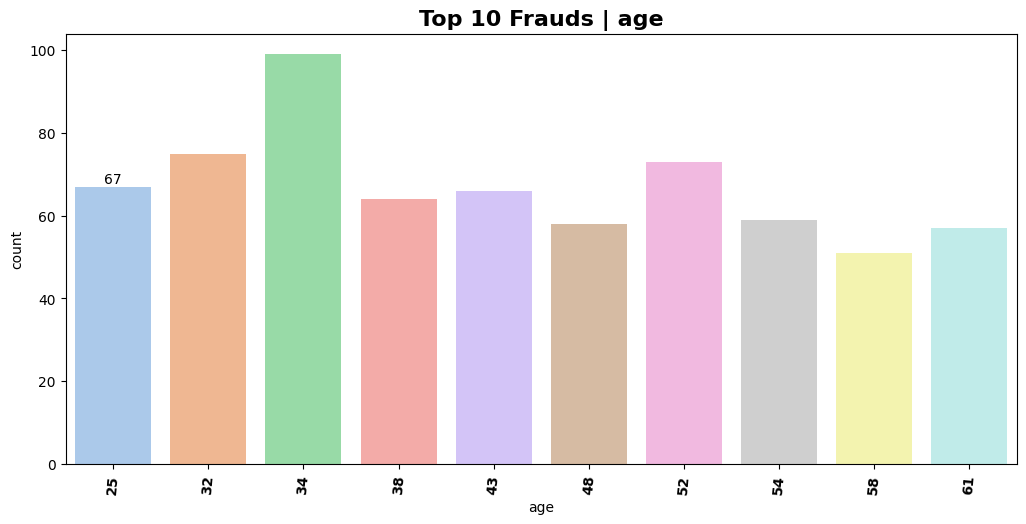

<Figure size 2700x1900 with 0 Axes>

In [33]:
# Function to visualize top fraudulent records for a given column
def bar_plot(col):
    def top_frauds(col):
        return pd.DataFrame(df.loc[df['is_fraud']==1,[col]].value_counts()).reset_index().head(10)
    ax = sns.barplot(data=top_frauds(col), x=col, y='count', palette='pastel')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=85, fontweight='bold')
    
    plt.figure(figsize=(27, 19))

# Generate top 10 fraudulent records for selected columns
for idx, val in enumerate(['cc_num', 'merchant', 'category', 'city', 'job', 'age']):
    plt.subplot(3, 2, idx + 1)
    bar_plot(val)
plt.tight_layout()
plt.show()


### 23.Visualisation of correlation between numeric columns

               cc_num       amt    gender       zip       lat      long  \
cc_num       1.000000  0.001963 -0.001482  0.041610 -0.057512 -0.048783   
amt          0.001963  1.000000  0.000027  0.002310  0.002339 -0.002046   
gender      -0.001482  0.000027  1.000000 -0.066467  0.042692  0.051235   
zip          0.041610  0.002310 -0.066467  1.000000 -0.115173 -0.909942   
lat         -0.057512  0.002339  0.042692 -0.115173  1.000000 -0.012892   
long        -0.048783 -0.002046  0.051235 -0.909942 -0.012892  1.000000   
city_pop    -0.009414  0.002760 -0.029367  0.075571 -0.152666 -0.051524   
unix_time   -0.000810 -0.000974 -0.000577  0.001395  0.000301 -0.001460   
merch_lat   -0.057183  0.002404  0.042569 -0.114809  0.993557 -0.012551   
merch_long  -0.048818 -0.002053  0.051203 -0.909117 -0.012831  0.999115   
is_fraud    -0.001540  0.182267  0.000748 -0.002271  0.005863 -0.000972   
age         -0.000467 -0.012864  0.005685  0.008283  0.046018 -0.027105   
month       -0.000542 -0.

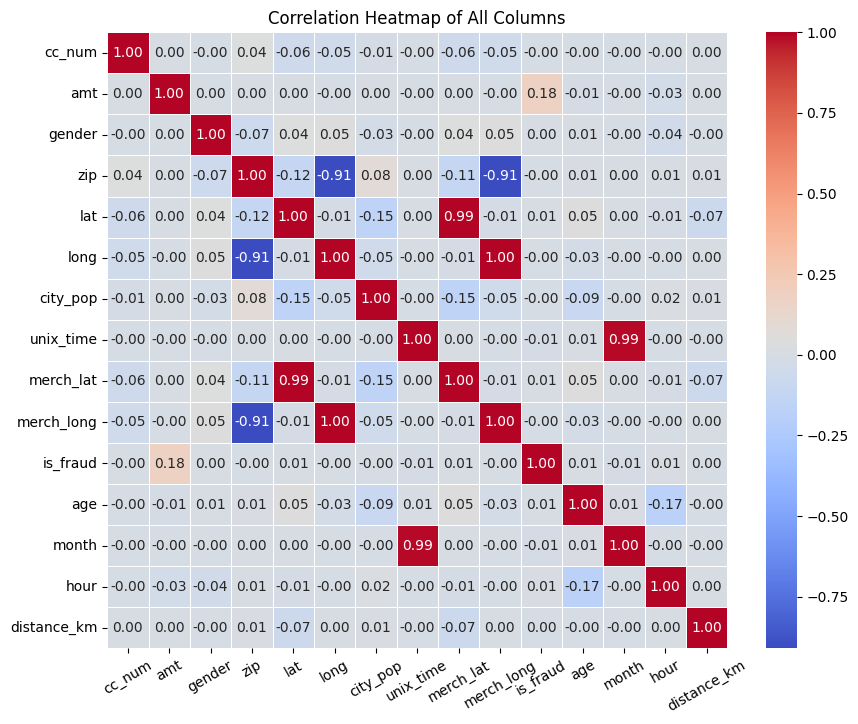

In [34]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Columns')

# Rotate the x-axis labels
plt.xticks(rotation=30)
plt.yticks(rotation=0)  # Ensure y-axis labels remain horizontal

plt.show()


In [35]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

               cc_num       amt    gender       zip       lat      long  \
cc_num       1.000000  0.001963 -0.001482  0.041610 -0.057512 -0.048783   
amt          0.001963  1.000000  0.000027  0.002310  0.002339 -0.002046   
gender      -0.001482  0.000027  1.000000 -0.066467  0.042692  0.051235   
zip          0.041610  0.002310 -0.066467  1.000000 -0.115173 -0.909942   
lat         -0.057512  0.002339  0.042692 -0.115173  1.000000 -0.012892   
long        -0.048783 -0.002046  0.051235 -0.909942 -0.012892  1.000000   
city_pop    -0.009414  0.002760 -0.029367  0.075571 -0.152666 -0.051524   
unix_time   -0.000810 -0.000974 -0.000577  0.001395  0.000301 -0.001460   
merch_lat   -0.057183  0.002404  0.042569 -0.114809  0.993557 -0.012551   
merch_long  -0.048818 -0.002053  0.051203 -0.909117 -0.012831  0.999115   
is_fraud    -0.001540  0.182267  0.000748 -0.002271  0.005863 -0.000972   
age         -0.000467 -0.012864  0.005685  0.008283  0.046018 -0.027105   
month       -0.000542 -0.